<a href="https://colab.research.google.com/github/DawiSyauqi/Jaringan-Saraf-Tiruan_Muhammad-Dawi-Syauqi/blob/main/Tugas_Pert_7_JST_Dawi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# ==============================================
# Import library
# ==============================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# ==============================================
# Load dataset
# ==============================================
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [13]:
# ==============================================
# Pisahkan fitur dan target
# ==============================================
X = df.drop(columns=["NObeyesdad"])
y = df["NObeyesdad"]

# One-hot encoding untuk kolom kategorikal
X_encoded = pd.get_dummies(X, drop_first=True)

# Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Encode label target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# One-hot encoding target untuk Softmax
y_train_cat = tf.keras.utils.to_categorical(y_train)
y_test_cat = tf.keras.utils.to_categorical(y_test)

In [14]:
# ==============================================
# 4️⃣ Bangun model neural network
# ==============================================
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# ==============================================
# Latih model
# ==============================================
history = model.fit(
    X_train, y_train_cat,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1406 - loss: 1.9514 - val_accuracy: 0.4349 - val_loss: 1.7060
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5036 - loss: 1.5890 - val_accuracy: 0.5355 - val_loss: 1.3546
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6053 - loss: 1.2124 - val_accuracy: 0.6243 - val_loss: 1.0850
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6812 - loss: 0.9572 - val_accuracy: 0.7012 - val_loss: 0.9059
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7387 - loss: 0.7923 - val_accuracy: 0.7189 - val_loss: 0.8032
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7848 - loss: 0.6754 - val_accuracy: 0.7544 - val_loss: 0.7073
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8144 - loss: 0.5963 - val_accuracy: 0.7929 - val_loss: 0.6476
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8336 - loss: 0.5413 - val_accuracy: 0.7899 - val_loss:

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Akurasi: 0.9173
F1-score: 0.9179

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.98      0.96      0.97        54
      Normal_Weight       0.83      0.84      0.84        58
     Obesity_Type_I       0.92      0.94      0.93        70
    Obesity_Type_II       0.98      0.95      0.97        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.81      0.86      0.83        58
Overweight_Level_II       0.91      0.86      0.88        58

           accuracy                           0.92       423
          macro avg       0.92      0.92      0.92       423
       weighted avg       0.92      0.92      0.92       423



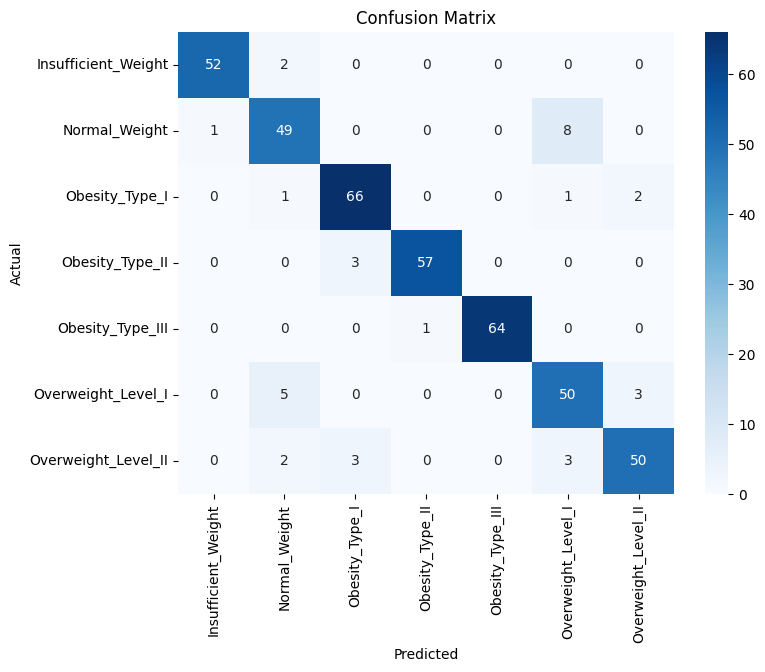

In [8]:
# ==============================================
# Evaluasi model
# ==============================================
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Akurasi dan F1-score
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print(f"Akurasi: {acc:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [9]:
# ==============================================
# Analisis kinerja model
# ==============================================
print("""
📊 Analisis Kinerja Model:
- Model menggunakan 2 hidden layer (64 dan 32 neuron) dengan aktivasi ReLU, dan Softmax di output.
- Akurasi menunjukkan seberapa tepat model mengklasifikasikan level obesitas.
- F1-score mempertimbangkan keseimbangan antara precision dan recall.
- Dari confusion matrix dapat dilihat apakah model sering salah mengklasifikasi antar level obesitas yang mirip.
- Jika akurasi >80%, model cukup baik; jika <70%, bisa tingkatkan dengan:
  • Menambah jumlah neuron atau layer
  • Menyesuaikan learning rate optimizer
  • Melakukan balancing data (jika tidak seimbang)
  • Menambah epoch pelatihan
""")


📊 Analisis Kinerja Model:
- Model menggunakan 2 hidden layer (64 dan 32 neuron) dengan aktivasi ReLU, dan Softmax di output.
- Akurasi menunjukkan seberapa tepat model mengklasifikasikan level obesitas.
- F1-score mempertimbangkan keseimbangan antara precision dan recall.
- Dari confusion matrix dapat dilihat apakah model sering salah mengklasifikasi antar level obesitas yang mirip.
- Jika akurasi >80%, model cukup baik; jika <70%, bisa tingkatkan dengan:
  • Menambah jumlah neuron atau layer
  • Menyesuaikan learning rate optimizer
  • Melakukan balancing data (jika tidak seimbang)
  • Menambah epoch pelatihan

